In [1]:
import os
import random
import cv2
import numpy as np
import skimage
from skimage import io
import imageio
from libtiff import TIFF
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import MyCollection as my

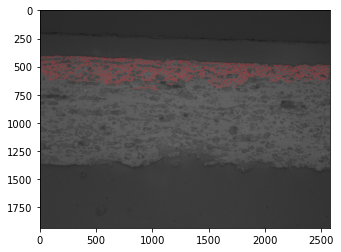

In [4]:
img = my.get_random_img_from_dir(my.DIR_ANNOTATED)
plt.imshow(img)

<h2> Shading Korrektur </h2>

aus: Demant2011 - Industrielle Bildverarbeitung (Kapitel 2.2.4)

Bilddivision für die Korrektur systematischer Helligkeitsfehler (bei linearer Beziehung zwischen Helligkeit und gemessenen Grauwert)

Helligkeitsfehler: $g(x,y) = f(x,y)b(x,y)$

$g(x,y)$: Grauwert des aufgenommenen Bildes

$b(x,y)$: wahrer Helligkeitswert

$f(x,y)$: Abbildungsfunktion für den Fehler

Vorgehen: 

Referenzbild mit homogener Helligkeit unter denselben Bedingungen erstellen. Es entsteht ein Bild mit Referenzgrauwerten g_r(x,y) aus denen sich bei bekannter Helligkeit b der aufgenommenen Fläche die Korrekturwerte zu f(x,y) = g_r(x,y)/b ergeben. Die wahren Helligkeiten b(x,y) lassen sich anschließend aus den aufgenommenen Grauwerten g(x,y) mittels Division durch die Referenzgrauwerte und Multiplikation mit der Referenzhelligkeit b berechnen. 

Dividierungsverfahren: $b(x,y) = b \cdot \frac{g(x,y)}{g_r(x,y)}$

Bei einer logarithmischen Beziehung zwischen Helligkeit und Grauwert wird ein Subtraktionsverfahren benutzt, welche zudem wesentlich weniger rechenintensiv ist und auch bei linearen Beziehungen ausreichend sein kann. Die Korrekturformel lautet dementsprechend: 

Subtraktionsverfahren: $b(x,y) = b + (g(x,y) - g_r(x,y))$